In [1]:
import os
import cv2
import shutil
import rasterio
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
from rasterio.enums import Resampling
from sklearn.model_selection import train_test_split

for dirname, _, filenames in os.walk('/kaggle/input'):
    
    print(os.path.join(dirname))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/water-segmentation-multispectral-and-optical-data
/kaggle/input/water-segmentation-multispectral-and-optical-data/data
/kaggle/input/water-segmentation-multispectral-and-optical-data/data/labels
/kaggle/input/water-segmentation-multispectral-and-optical-data/data/images


In [2]:
!pip install tifffile


In [3]:
# mode 
mode = 0o666
   
# Path 
path1 = "/kaggle/working/water-segmentation-multispectral-and-optical-data"
path2 = "/kaggle/working/water-segmentation-multispectral-and-optical-data/data"
if not Path(path1).exists():
    os.mkdir(path1, mode) 
    
    
if not Path(path2).exists():
    os.mkdir(path2, mode)  

In [4]:



DATA_PATH = "/kaggle/input/water-segmentation-multispectral-and-optical-data/data"
IMAGES= "images"
LABEL= "labels"
LabelAfterEdit="labelsAfterEdit"
LABELS_PATH = "/kaggle/working/water-segmentation-multispectral-and-optical-data/data/labels"
IMG_PATH ="/kaggle/input/water-segmentation-multispectral-and-optical-data/data/images/94.tif"
IMG_LABEL= "/kaggle/input/water-segmentation-multispectral-and-optical-data/data/labels/0.png"


In [5]:
data = {}
data[IMAGES] = []
data[LABEL] = []
data[LabelAfterEdit] = []
for dirname in os.listdir(DATA_PATH):
    print()
    for file in os.listdir(os.path.join(f'{DATA_PATH}/{dirname}')):
        data[dirname].append(os.path.join(f'{DATA_PATH}/{dirname}/{file}'))
        
        
print(f"the len of images : {len(data[IMAGES])}")
print(f"the len of Labels : {len(data[LABEL])}")



the len of images : 306
the len of Labels : 456


In [6]:
 for file in os.listdir(os.path.join(f'{DATA_PATH}/{LABEL}')):
    if len( file.split("_")) == 1:
        if not Path(f"/kaggle/working/water-segmentation-multispectral-and-optical-data/data/{LABEL}").exists():
            os.mkdir(f"/kaggle/working/water-segmentation-multispectral-and-optical-data/data/{LABEL}", mode) 
        shutil.copy(os.path.join(f'{DATA_PATH}/{LABEL}/{file}'), f"/kaggle/working/water-segmentation-multispectral-and-optical-data/data/{LABEL}")


In [7]:
    for file in os.listdir(os.path.join(f'{LABELS_PATH}')):
        data[LabelAfterEdit].append(os.path.join(f'{LABELS_PATH}/{file}'))
        
        
print(f"the len of images : {len(data[IMAGES])}")
print(f"the len of Labels : {len(data[LabelAfterEdit])}")

the len of images : 306
the len of Labels : 306


In [8]:
data[IMAGES] = sorted(data[IMAGES])
data[LabelAfterEdit] = sorted(data[LabelAfterEdit])

In [9]:
for i in range(10):
    print(f"image : {data[IMAGES][i]} ===> Label: {data[LabelAfterEdit][i]}'")

image : /kaggle/input/water-segmentation-multispectral-and-optical-data/data/images/0.tif ===> Label: /kaggle/working/water-segmentation-multispectral-and-optical-data/data/labels/0.png'
image : /kaggle/input/water-segmentation-multispectral-and-optical-data/data/images/1.tif ===> Label: /kaggle/working/water-segmentation-multispectral-and-optical-data/data/labels/1.png'
image : /kaggle/input/water-segmentation-multispectral-and-optical-data/data/images/10.tif ===> Label: /kaggle/working/water-segmentation-multispectral-and-optical-data/data/labels/10.png'
image : /kaggle/input/water-segmentation-multispectral-and-optical-data/data/images/100.tif ===> Label: /kaggle/working/water-segmentation-multispectral-and-optical-data/data/labels/100.png'
image : /kaggle/input/water-segmentation-multispectral-and-optical-data/data/images/101.tif ===> Label: /kaggle/working/water-segmentation-multispectral-and-optical-data/data/labels/101.png'
image : /kaggle/input/water-segmentation-multispectral-

In [10]:
print(data[IMAGES][0])

/kaggle/input/water-segmentation-multispectral-and-optical-data/data/images/0.tif


In [11]:
import tifffile as tiff
# Example: Loading a Sentinel-2 image
def load_multispectral_image(file_path):
    try:
        with tiff.TiffFile(file_path) as tif:
            bands = tif.asarray()  # Reads the image data into a NumPy array
            profile = {
                "shape": bands.shape,
                "dtype": bands.dtype,
                "num_pages": len(tif.pages),  # Number of bands/pages
                "description": tif.pages[0].description if tif.pages else None
            }
        return bands, profile
    except Exception as e:
        print(f"Error loading image: {e}")
        return None, None

multispectral_bands, profile = load_multispectral_image(IMG_PATH)
print(f"Data shape: {multispectral_bands.shape}")


Data shape: (128, 128, 12)


In [12]:
multispectral_bands ,profile = load_multispectral_image(data[IMAGES][0])
print(f"Data shape: {multispectral_bands.shape}")

Data shape: (128, 128, 12)


In [13]:

# we donot need to resmaple the images
def resample_band(src_path, target_profile, band_index=1):
    with rasterio.open(src_path) as src:
        data = src.read(
            band_index,
            out_shape=(
                target_profile['shape'][0],
                target_profile['shape'][1]
            ),
            resampling=Resampling.bilinear
        )
    return data

# Example: Resampling a band to match target profile
resampled_band = resample_band(data[IMAGES][0], profile, band_index=2)


/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [14]:
resampled_band.shape

(128, 128)

In [15]:
def normalize(bands):
    # Min-Max normalization
    bands_min = bands.min(axis=(1,2), keepdims=True)
    bands_max = bands.max(axis=(1,2), keepdims=True)
    bands_normalized = (bands - bands_min) / (bands_max - bands_min)
    return bands_normalized

multispectral_normalized = normalize(multispectral_bands)
print(f"Normalized data range: {multispectral_normalized.min()} to {multispectral_normalized.max()}")


Normalized data range: 0.0 to 1.0


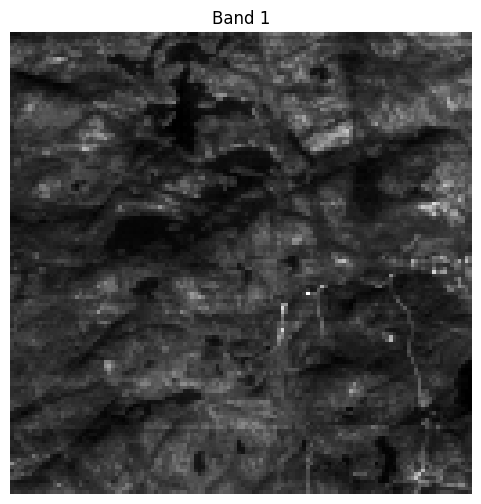

In [16]:
def plot_band(band, title='Band'):
    plt.figure(figsize=(6,6))
    plt.imshow(band, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example: Plotting the first band
plot_band(multispectral_normalized[:,:,1], title='Band 1')


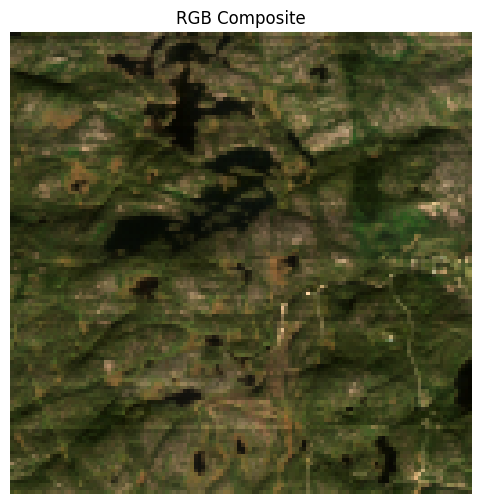

In [17]:
def create_rgb_composite(bands, red, green, blue):
    rgb = np.stack([bands[:,:,red], bands[:,:,green], bands[:,:,blue]], axis=-1)
    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())  # Normalize to [0,1]
    return rgb

# Example: Sentinel-2 bands for RGB (B4, B3, B2)
rgb_image = create_rgb_composite(multispectral_normalized, red=3, green=2, blue=1)
plt.figure(figsize=(6,6))
plt.imshow(rgb_image)
plt.title('RGB Composite')
plt.axis('off')
plt.show()


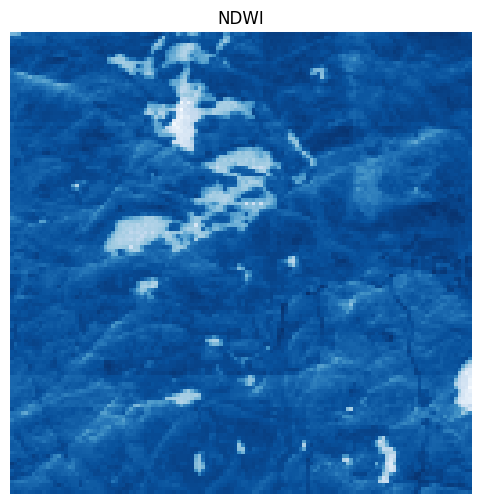

In [18]:
def calculate_ndwi(green_band, nir_band):
    ndwi = (green_band - nir_band) / (green_band + nir_band)
    return ndwi

# Example: Sentinel-2 bands (Green: B3, NIR: B8)
ndwi = calculate_ndwi(multispectral_normalized[:,:,2], multispectral_normalized[:,:,7])
plt.figure(figsize=(6,6))
plt.imshow(ndwi, cmap='Blues')
plt.title('NDWI')
plt.axis('off')
plt.show()


In [19]:
def load_label(label_path):
    # Load the image in grayscale mode
    label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
    
    if label is None:
        raise FileNotFoundError(f"The file {label_path} does not exist or could not be read.")
    
    return label

# Replace with your actual label file path
label = load_label(data[LabelAfterEdit][0])

# Ensure label shape matches input data
assert label.shape == multispectral_normalized.shape[:2], "Label shape does not match input data shape."


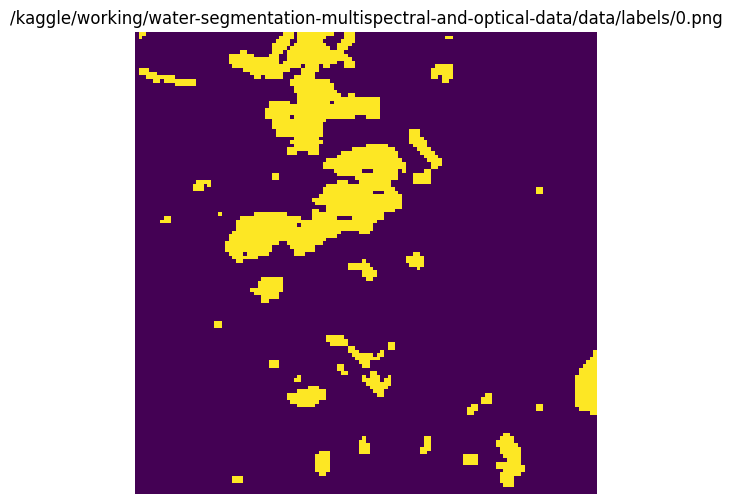

In [20]:

plt.figure(figsize=(6,6))
plt.title(data[LabelAfterEdit][0])
plt.imshow(label)
# plt.title('Label')
plt.axis('off')
plt.show()


In [21]:
DataSet={}

DataSet[IMAGES] = [ ]
DataSet[LABEL] = [ ]

for  i in range(len(data[IMAGES])):
    multispectral_bands, _ = load_multispectral_image(data[IMAGES][i])
    multispectral_normalized = normalize(multispectral_bands)
    label = load_label(data[LabelAfterEdit][i])
    DataSet[IMAGES].append(multispectral_normalized)
    DataSet[LABEL].append(label)

        
#     multispectral_bands, profile = load_multispectral_image(os.path.join(f'{IMAGES_PATH}/{filenames}'))
#     multispectral_normalized = normalize(multispectral_bands)

In [22]:
DataSet[LABEL][0]

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
def visualize_label(label_array):
    plt.figure(figsize=(6,6))
    plt.imshow(label_array, cmap='jet')  # 'jet' colormap is useful for visualization, adjust as needed
    plt.colorbar()
    plt.axis('off')
    plt.show()

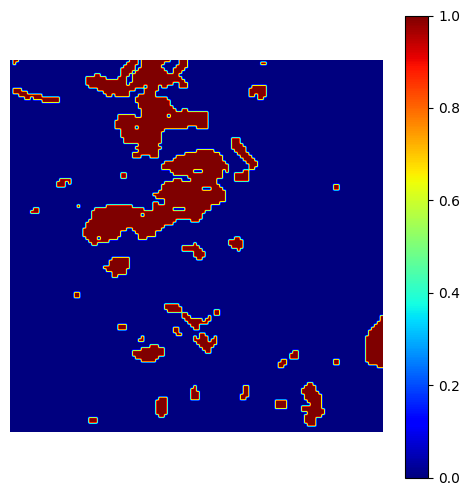

In [24]:
visualize_label(DataSet[LABEL][0])

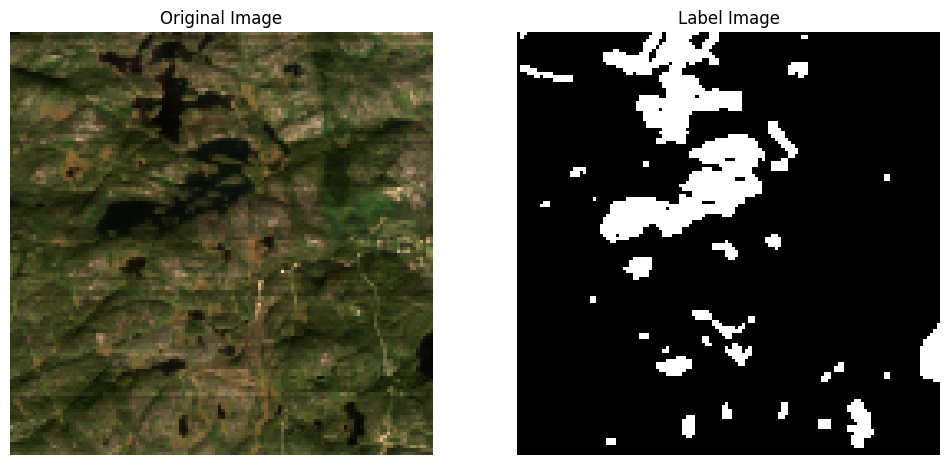

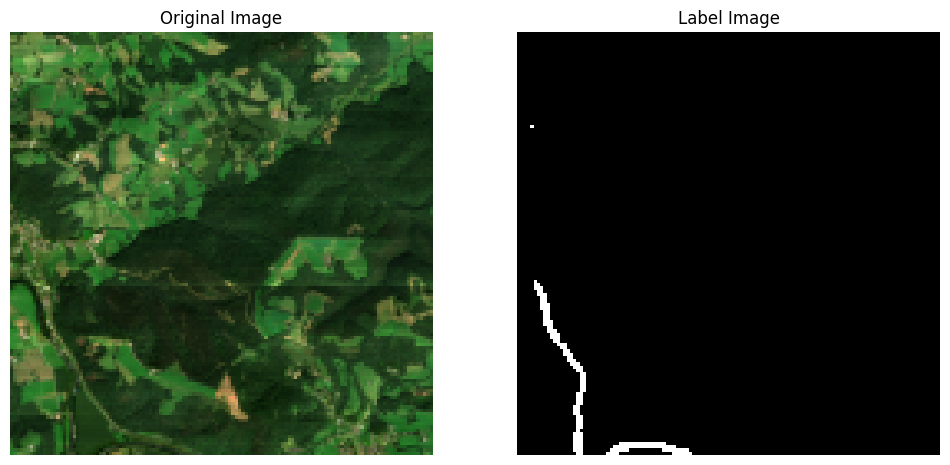

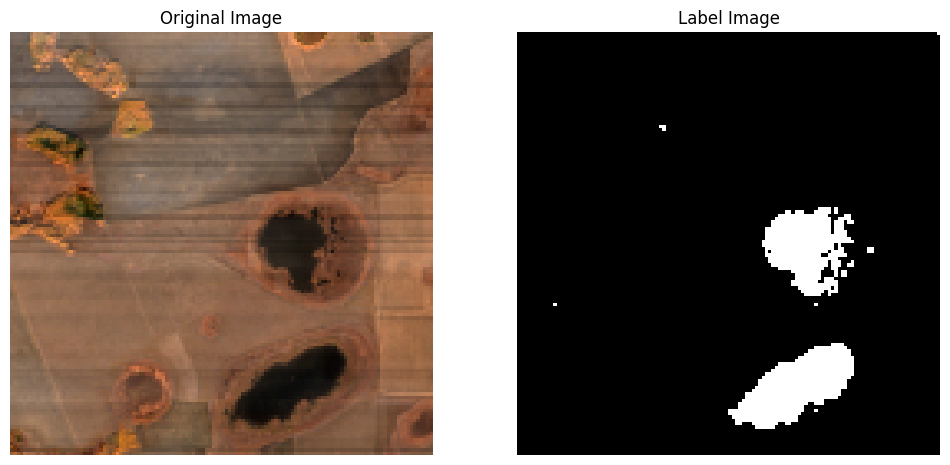

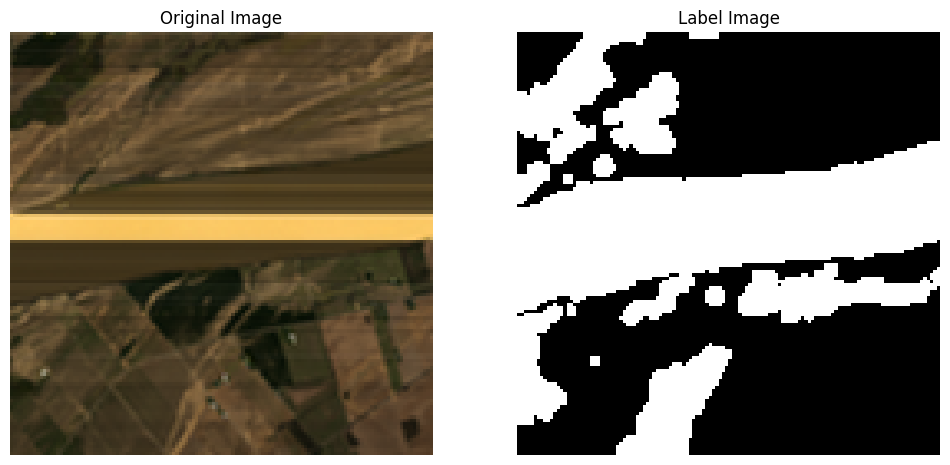

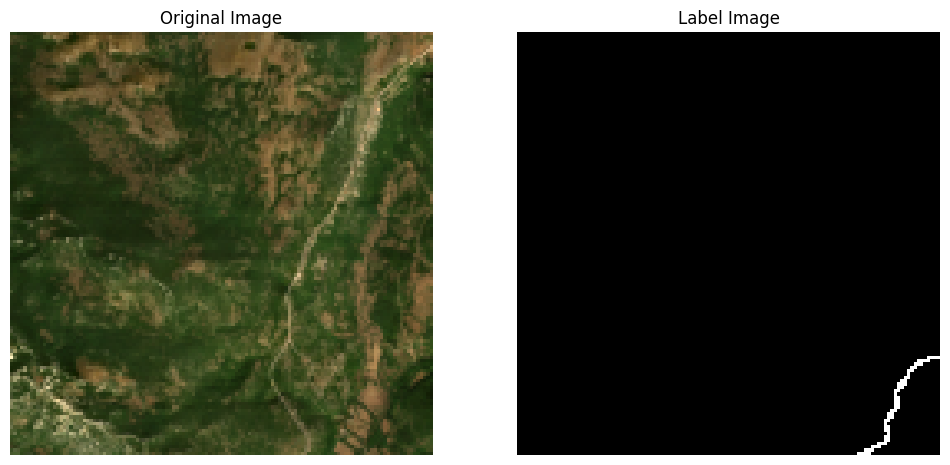

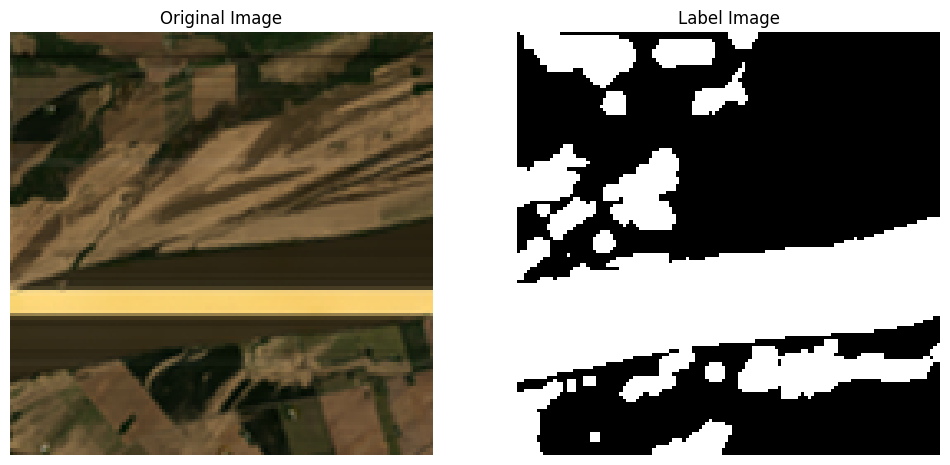

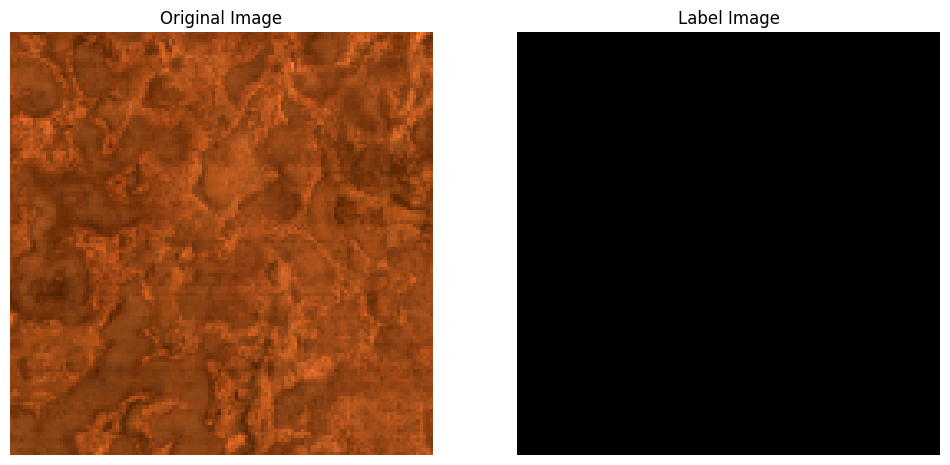

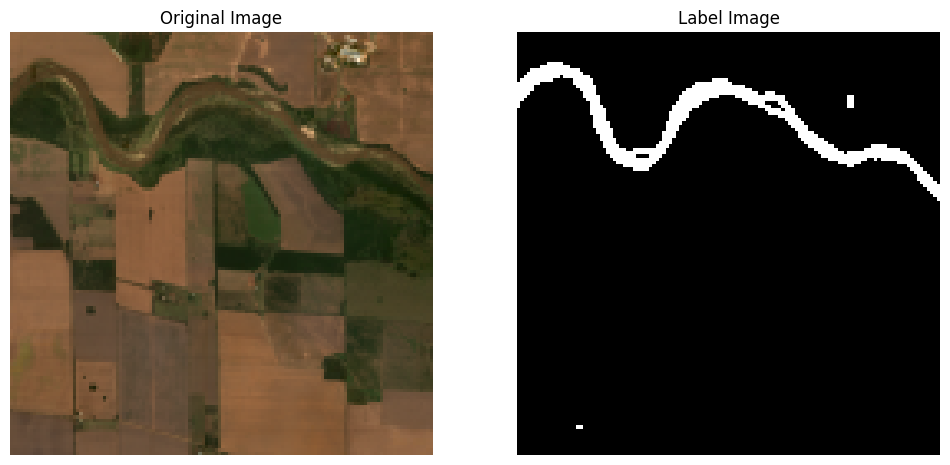

In [25]:
def plot_image_and_label(image, label):
    # Convert BGR to RGB for proper display in matplotlib
    rgb_image = create_rgb_composite(image, red=3, green=2, blue=1)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original image
    axes[0].imshow(rgb_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot the label image
    axes[1].imshow(label, cmap='gray')  # 'jet' colormap for better visualization
    axes[1].set_title('Label Image')
    axes[1].axis('off')

    plt.show()

for i in range(8):
    plot_image_and_label(DataSet[IMAGES][i], DataSet[LABEL][i])


In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

def create_patches(data, labels, patch_size=128, overlap=0):
    patches = []
    label_patches = []
    step = patch_size - overlap
    
    for i in range(0, data.shape[0] - patch_size + 1, step):
        for j in range(0, data.shape[1] - patch_size + 1, step):
            # Extracting the patch for data
            patch = data[i:i + patch_size, j:j + patch_size, :]
            # Extracting the corresponding patch for labels
            label_patch = labels[i:i + patch_size, j:j + patch_size]
            # Append patches to the respective lists
            patches.append(patch)
            label_patches.append(label_patch)
    
    # Convert lists to numpy arrays for easier handling
    return np.array(patches), np.array(label_patches)

# Example usage:
patches, label_patches = create_patches(multispectral_normalized, label, patch_size=32, overlap=0)
print(f"Total patches: {patches.shape[0]}")

# Split the patches into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(patches, label_patches, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")


Total patches: 16
Training samples: 12, Validation samples: 4


In [27]:
DataSet[LABEL][0]

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

SIZE = 32

def create_patches(data, labels, patch_size=128, overlap=0):
    patches = []
    label_patches = []
    step = patch_size - overlap
    
    # Iterate over the first two dimensions (height and width)
    for i in range(0, data.shape[0] - patch_size + 1, step):
        for j in range(0, data.shape[1] - patch_size + 1, step):
            # Extracting the patch for data
            patch = data[i:i + patch_size, j:j + patch_size, :]
            # Extracting the corresponding patch for labels
            label_patch = labels[i:i + patch_size, j:j + patch_size]
            # Append patches to the respective lists
            patches.append(patch)
            label_patches.append(label_patch)
    
    return np.array(patches), np.array(label_patches)

def process_images(images, labels, patch_size=128, overlap=0):
    all_patches = []
    all_label_patches = []
    
    for img, lbl in zip(images, labels):
        patches, label_patches = create_patches(img, lbl, patch_size, overlap)
        all_patches.append(patches)
        all_label_patches.append(label_patches)
    
    # Concatenate all patches from all images
    all_patches = np.concatenate(all_patches, axis=0)
    all_label_patches = np.concatenate(all_label_patches, axis=0)
    
    return all_patches, all_label_patches

# Example usage:
patches, label_patches = process_images(DataSet[IMAGES], DataSet[LABEL], patch_size=SIZE, overlap=0)
print(f"Total patches: {patches.shape[0]}")

# Split into training and validation
X_train, X_val, y_train, y_val = train_test_split(patches, label_patches, test_size=0.2, random_state=42)

# Print the shape of training and validation sets
print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")


Total patches: 4896
Training samples: 3916, Validation samples: 980


In [29]:
X_train.shape[1:]

(32, 32, 12)

In [30]:
X_train.shape

(3916, 32, 32, 12)

In [31]:
y_train.shape

(3916, 32, 32)

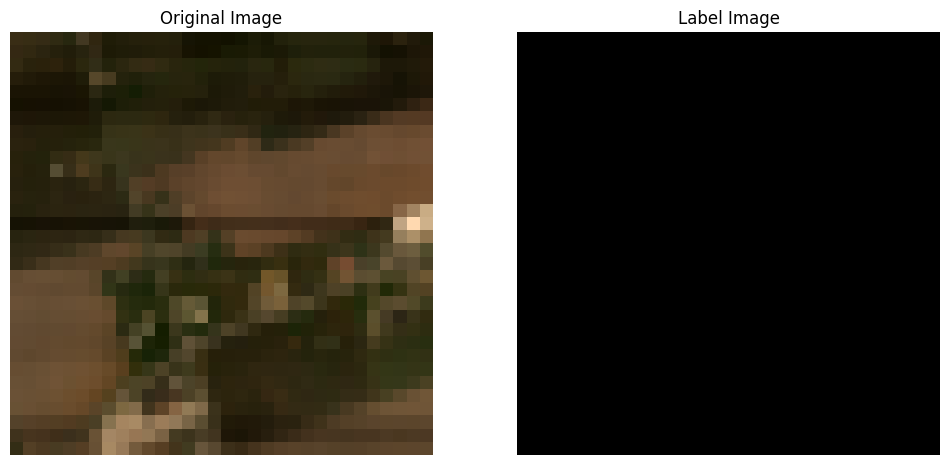

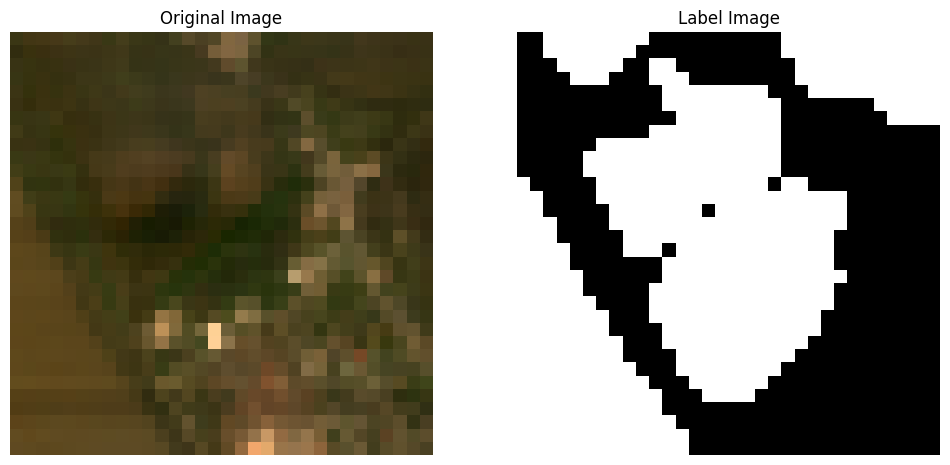

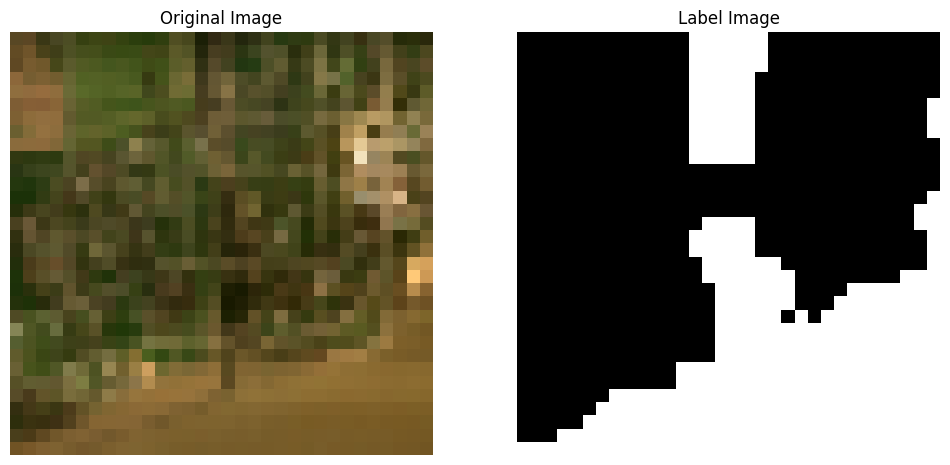

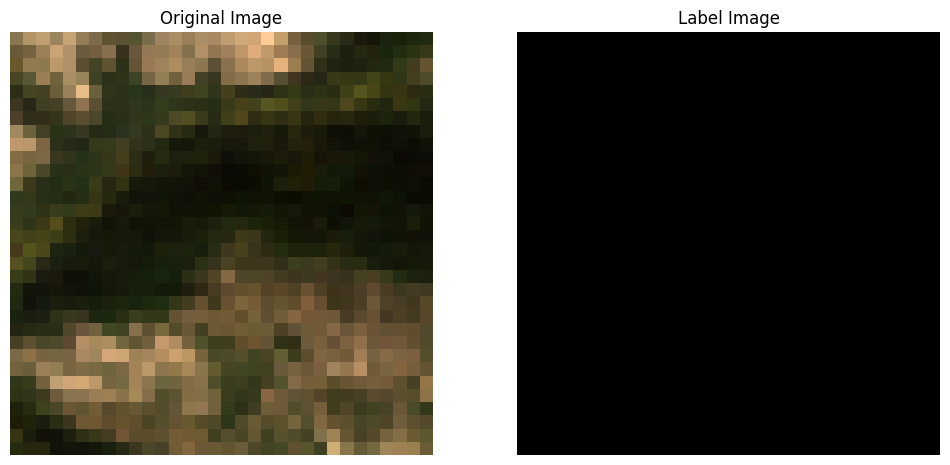

In [32]:
for i in range(int(128/32)):
    plot_image_and_label(X_train[i], y_train[i])

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = 1
def unet_model(input_size=(SIZE, SIZE,12), num_classes=1):
    inputs = layers.Input(input_size)
    
    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)
    
    # Decoder
    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)
    
    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
    
    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid', padding='same')(c7)
    
    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate the model

model = unet_model(input_size = X_train.shape[1:], num_classes=num_classes)
model.summary()





Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32,    │          0 │ -                 │
│ (InputLayer)        │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      6,976 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 128) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 256) │    295,168 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 256) │    590,080 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 16, 16,    │    131,200 │ conv2d_5[0][0]    │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 256)              │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │    295,040 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 32, 32,    │     32,832 │ conv2d_7[0][0]    │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 32, 32,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 128)              │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 32,    │     73,792 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │     36,928 │ conv2d_8[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,868,033 (7.13 MB)

 Trainable params: 1,868,033 (7.13 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from sklearn.utils.class_weight import compute_class_weight

# Flatten y_train to create a 1D array of labels
y_train_flattened = y_train.flatten()

# Get unique class labels
unique_classes = np.unique(y_train_flattened)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=unique_classes,
    y=y_train_flattened
)

# Create a dictionary for class weights
class_weights_dict = dict(zip(unique_classes, class_weights))

print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.6749024164632415, 1: 1.9293684733197587}


In [35]:
flattened_y = y_train.flatten()
l = np.array([class_weights_dict[label] for label in flattened_y])

In [36]:
l.max()

1.9293684733197587

In [37]:
# Create sample weights based on class weights
def create_sample_weights(y, class_weights_dict):
    flattened_y = y.flatten()
    sample_weights = np.array([class_weights_dict[label] for label in flattened_y])
    return sample_weights.reshape(y.shape)

# Create sample weights for training data
sample_weights = create_sample_weights(y_train, class_weights_dict)


In [38]:
sample_weights.shape

(3916, 32, 32)

In [39]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])


In [40]:
y_train = np.expand_dims(y_train, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)
sample_weights = np.expand_dims(sample_weights, axis=-1)

In [41]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (3916, 32, 32, 12)
y_train shape: (3916, 32, 32, 1)
X_val shape: (980, 32, 32, 12)
y_val shape: (980, 32, 32, 1)


In [42]:
sample_weights.max()

1.9293684733197587

In [43]:
sample_weights.min()

0.6749024164632415

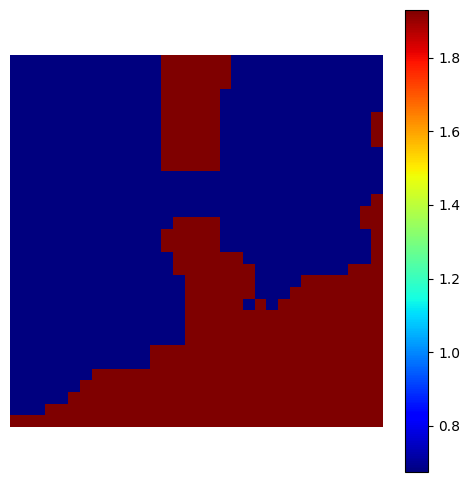

In [44]:
visualize_label(sample_weights[2])

In [45]:
print("Sample weights shape:", sample_weights.shape)


Sample weights shape: (3916, 32, 32, 1)


In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

checkpoint = ModelCheckpoint('unet_water_segmentation.keras',
    monitor='val_loss', 
    mode='min',
    save_best_only=True,
    save_freq='epoch',
    verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=32,
 sample_weight=sample_weights,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/150


I0000 00:00:1725380289.238200     118 service.cc:145] XLA service 0x7e7d24006230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725380289.238260     118 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 15/123 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - AUC: 0.7627 - accuracy: 0.7611 - loss: 0.6814

I0000 00:00:1725380293.859463     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - AUC: 0.8563 - accuracy: 0.8419 - loss: 0.5414
Epoch 1: val_loss improved from inf to 0.31972, saving model to unet_water_segmentation.keras
123/123 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - AUC: 0.8566 - accuracy: 0.8421 - loss: 0.5405 - val_AUC: 0.9285 - val_accuracy: 0.8826 - val_loss: 0.3197
Epoch 2/150
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.9260 - accuracy: 0.8728 - loss: 0.3484
Epoch 2: val_loss did not improve from 0.31972
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - AUC: 0.9261 - accuracy: 0.8729 - loss: 0.3481 - val_AUC: 0.9366 - val_accuracy: 0.8415 - val_loss: 0.3745
Epoch 3/150
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.9354 - accuracy: 0.8767 - loss: 0.3313
Epoch 3: val_loss improved from 0.31972 to 0.30190, saving model to unet_water_segmentation.keras
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - AUC: 0.9355 - accuracy: 0.8768 - loss: 0.3308 - val_AUC: 0.9426 - val_accuracy: 0.8680 - val_loss: 0.3019
Epoch 4/150
119/

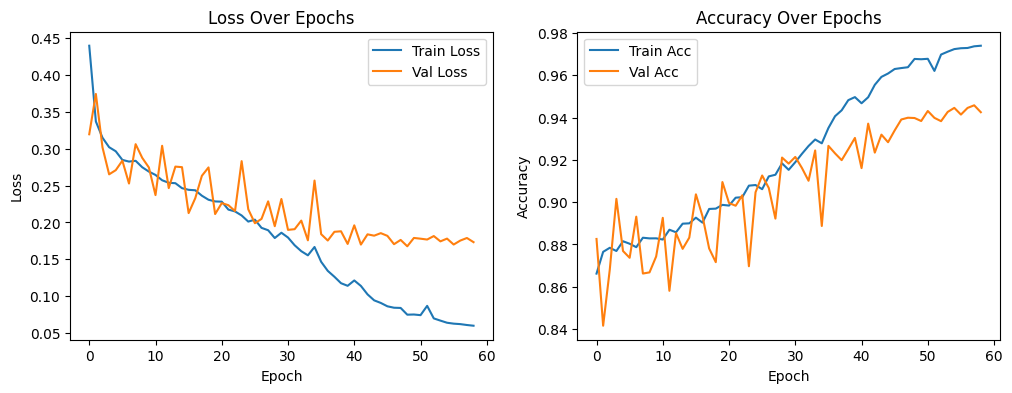

In [47]:
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on validation set
y_pred = model.predict(X_val)





31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [49]:

y_pred_classes = np.argmax(y_pred, axis=-1)
y_true_classes = y_val

print(y_pred_classes.shape , y_true_classes.shape )

(980, 32, 32) (980, 32, 32, 1)


In [50]:
# Flatten the arrays
y_pred_flat = y_pred_classes.flatten()
y_true_flat = y_true_classes.flatten()

# Classification report
print(classification_report(y_true_flat, y_pred_flat))



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85    740444
           1       0.00      0.00      0.00    263076

    accuracy                           0.74   1003520
   macro avg       0.37      0.50      0.42   1003520
weighted avg       0.54      0.74      0.63   1003520



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# Confusion matrix
cm = confusion_matrix(y_true_flat, y_pred_flat)
print(cm)

[[740444      0]
 [263076      0]]


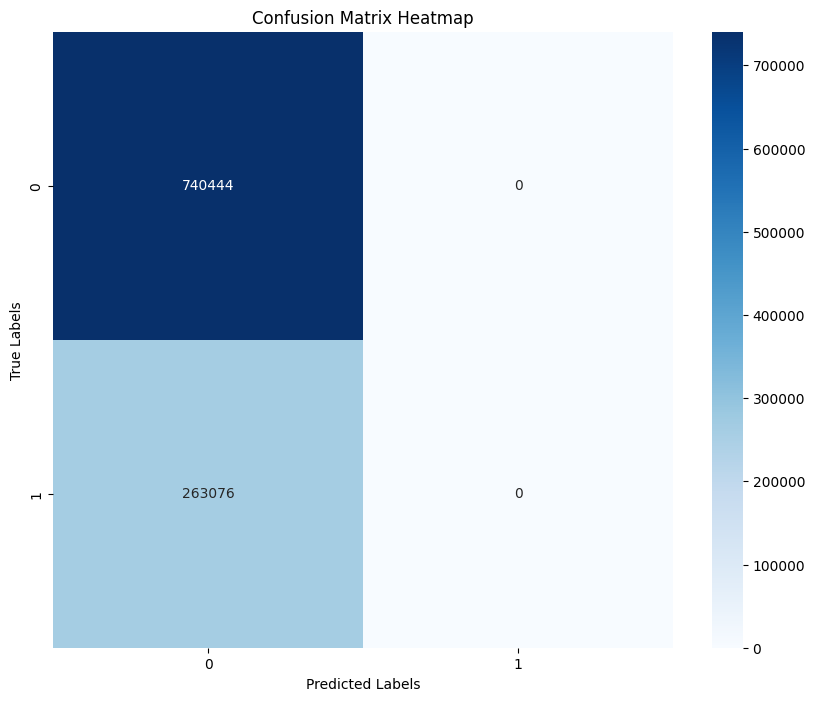

In [52]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [53]:
# Evaluate the model
eval_results = model.evaluate(X_val, y_val)

# Assuming you have one loss and multiple metrics, you can unpack as follows:
loss = eval_results[0]
metrics = eval_results[1:]

print("Loss: {:5.2f}".format(loss))
for metric_name, metric_value in zip(model.metrics_names[1:], metrics):
    print(f"{metric_name}: {metric_value:.4f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9781 - accuracy: 0.9404 - loss: 0.1659
Loss:  0.17
compile_metrics: 0.9398


In [54]:
# Save the entire model as a `.keras` zip archive.
model.save('final_model.keras')